In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
#creating dataset (XOR problem)
x = torch.tensor([[1,0], [1,1], [0,1], [0,0]]).float() #(4,2)
y = torch.tensor([[1],[0],[1],[0]]).float() #(4,1)

In [3]:
print(x.shape)
print(y.shape)

torch.Size([4, 2])
torch.Size([4, 1])


In [4]:
#initialising weights and biases
W1 = torch.randn(2,4, requires_grad=True) #no typecasting as randn already creates float tensors
b1 = torch.randn(4, requires_grad=True)
W2 = torch.randn(4,1, requires_grad=True)
b2 = torch.randn(1, requires_grad=True)

In [5]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

torch.Size([2, 4])
torch.Size([4])
torch.Size([4, 1])
torch.Size([1])


In [6]:
#Forward pass
Z1 = x@W1 + b1 #output of hidden layer without activation
#print(Z1) #(4,4)
A1 = torch.sigmoid(Z1)
#print(A1) #(4,4)
Z2 = A1@W2 + b2 #output of output layer without activation
#print(Z2) #(4,1)
A2 = torch.sigmoid(Z2) #final predicted outputs for 4 samples
print(A2)
print(A2.shape) #(4,1)

tensor([[0.0101],
        [0.0180],
        [0.0311],
        [0.0193]], grad_fn=<SigmoidBackward0>)
torch.Size([4, 1])


In [7]:
#Loss computation
loss = torch.mean((A2-y)**2)
print(loss)

tensor(0.4798, grad_fn=<MeanBackward0>)


In [8]:
#Backward pass
#loss.backward()

#print(W1.grad)

##got error - trying to backward through the graph a second time. WHY ? - because pytorch deletes the computational graph once it completes the backward pass.
              ##so we have to include this in a for loop and run through loop so that each time we get a new forward pass params and backward params.

In [9]:
losses = [] #list for storing losses after each epoch

for epoch in range(10000):
  #Forward pass
  Z1 = x@W1 + b1 #output of hidden layer without activation
  #print(Z1) #(4,4)
  A1 = torch.sigmoid(Z1)
  #print(A1) #(4,4)
  Z2 = A1@W2 + b2 #output of output layer without activation
  #print(Z2) #(4,1)
  A2 = torch.sigmoid(Z2) #final predicted outputs for 4 samples

  #Loss computation
  loss = torch.mean((A2-y)**2)
  losses.append(loss.item()) #item() converts tensor into python float

  #Backward pass
  loss.backward() #computes gradient wrt each param (w,b)

  #print("Gradients for W1:\n", W1.grad)
  #print("Gradients for b1:\n", b1.grad)
  #print("Gradients for W2:\n", W2.grad)
  #print("Gradients for b2:\n", b2.grad)

  #Update weights and biases
  learning_rate = 0.1
  with torch.no_grad():
    W1 -= learning_rate * W1.grad
    b1 -= learning_rate * b1.grad
    W2 -= learning_rate * W2.grad
    b2 -= learning_rate * b2.grad

  W1.grad.zero_()
  b1.grad.zero_()
  W2.grad.zero_()
  b2.grad.zero_()

  if epoch % 100 == 0:
    print(f"Epoch {epoch}: Loss = {loss.item()}")

Epoch 0: Loss = 0.4798491597175598
Epoch 100: Loss = 0.4661630094051361
Epoch 200: Loss = 0.42187610268592834
Epoch 300: Loss = 0.2942265272140503
Epoch 400: Loss = 0.26160478591918945
Epoch 500: Loss = 0.2583264410495758
Epoch 600: Loss = 0.2562725245952606
Epoch 700: Loss = 0.25467830896377563
Epoch 800: Loss = 0.2534083425998688
Epoch 900: Loss = 0.25237128138542175
Epoch 1000: Loss = 0.2515007555484772
Epoch 1100: Loss = 0.2507478594779968
Epoch 1200: Loss = 0.2500758767127991
Epoch 1300: Loss = 0.2494562864303589
Epoch 1400: Loss = 0.2488664835691452
Epoch 1500: Loss = 0.24828775227069855
Epoch 1600: Loss = 0.24770429730415344
Epoch 1700: Loss = 0.24710236489772797
Epoch 1800: Loss = 0.24646919965744019
Epoch 1900: Loss = 0.2457929253578186
Epoch 2000: Loss = 0.2450622022151947
Epoch 2100: Loss = 0.2442655712366104
Epoch 2200: Loss = 0.24339145421981812
Epoch 2300: Loss = 0.2424280345439911
Epoch 2400: Loss = 0.2413627952337265
Epoch 2500: Loss = 0.24018274247646332
Epoch 2600: Lo

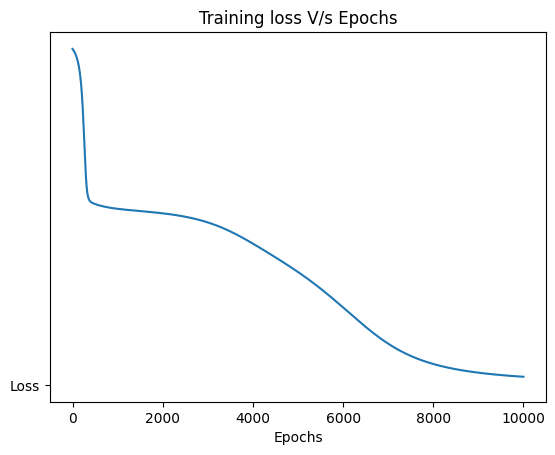

In [10]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.plot("Loss")
plt.title("Training loss V/s Epochs")
plt.show()

In [11]:
# Forward pass using trained weights
Z1 = x @ W1 + b1
A1 = torch.sigmoid(Z1)
Z2 = A1 @ W2 + b2
A2 = torch.sigmoid(Z2)

print("Final predicted outputs:\n", A2)

Final predicted outputs:
 tensor([[0.8935],
        [0.1205],
        [0.8922],
        [0.0953]], grad_fn=<SigmoidBackward0>)


In [12]:
final_loss = torch.mean((A2 - y)**2)
print("Final loss:", final_loss.item())

Final loss: 0.01164200808852911


In [13]:
predictions = (A2 > 0.5).int()
print("Rounded predictions:\n", predictions)

Rounded predictions:
 tensor([[1],
        [0],
        [1],
        [0]], dtype=torch.int32)
